In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Read Dataset
df = pd.read_csv("../data/SouthGermanCredit.csv", sep=",")

In [3]:
# Get dummies
df = pd.get_dummies(df, drop_first=True)

In [4]:
# Normalize variables
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['credit_risk_good']),
                                                    df['credit_risk_good'],
                                                    test_size=0.3)

In [6]:
# Model
model = keras.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(df.shape[1] - 1,)))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7040      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 171,905
Trainable params: 171,905
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train model
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.SGD(),
    metrics=["AUC"],
)

history = model.fit(X_train,
                    y_train,
                    batch_size=64,
                    epochs=500,
                    validation_split=0.2,
                    callbacks=[keras.callbacks.EarlyStopping(patience=50)])

Epoch 1/500
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
9/9 [==============================] - 0s 34ms/step - loss: 0.6836 - auc: 0.4334 - val_loss: 0.6699 - val_auc: 0.4042
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6663 - auc: 0.4912 - val_loss: 0.6532 - val_auc: 0.4377
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 0.6527 - auc: 0.5144 - val_loss: 0.6403 - val_auc: 0.4810
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 0.6422 - auc: 0.5138 - val_loss: 0.6308 - val_auc: 0.5032
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 0.6346 - auc: 0.5317 - val_loss: 0.6230 - val_auc: 0.5245
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 0.6286 - auc: 0.5339 - val_loss: 0.6173 - val_auc: 0.5536
Epoch 7/500
9/9 [==============================] - 0s 5ms/step - loss: 0.6240 - auc: 0.5709 - val_loss: 0.6125 - val_auc: 0.5631
Epoch 8/500
9/9

9/9 [==============================] - 0s 5ms/step - loss: 0.5436 - auc: 0.7977 - val_loss: 0.5351 - val_auc: 0.7915
Epoch 62/500
9/9 [==============================] - 0s 5ms/step - loss: 0.5416 - auc: 0.7983 - val_loss: 0.5335 - val_auc: 0.7910
Epoch 63/500
9/9 [==============================] - 0s 5ms/step - loss: 0.5397 - auc: 0.8002 - val_loss: 0.5318 - val_auc: 0.7905
Epoch 64/500
9/9 [==============================] - 0s 5ms/step - loss: 0.5382 - auc: 0.7991 - val_loss: 0.5305 - val_auc: 0.7924
Epoch 65/500
9/9 [==============================] - 0s 6ms/step - loss: 0.5362 - auc: 0.8004 - val_loss: 0.5289 - val_auc: 0.7908
Epoch 66/500
9/9 [==============================] - 0s 5ms/step - loss: 0.5343 - auc: 0.8010 - val_loss: 0.5272 - val_auc: 0.7912
Epoch 67/500
9/9 [==============================] - 0s 5ms/step - loss: 0.5324 - auc: 0.8012 - val_loss: 0.5254 - val_auc: 0.7901
Epoch 68/500
9/9 [==============================] - 0s 5ms/step - loss: 0.5309 - auc: 0.8007 - val_loss

Epoch 124/500
9/9 [==============================] - 0s 6ms/step - loss: 0.4553 - auc: 0.8399 - val_loss: 0.4875 - val_auc: 0.7866
Epoch 125/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4536 - auc: 0.8419 - val_loss: 0.4857 - val_auc: 0.7881
Epoch 126/500
9/9 [==============================] - 0s 5ms/step - loss: 0.4530 - auc: 0.8419 - val_loss: 0.4864 - val_auc: 0.7879
Epoch 127/500
9/9 [==============================] - 0s 6ms/step - loss: 0.4518 - auc: 0.8430 - val_loss: 0.4869 - val_auc: 0.7871
Epoch 128/500
9/9 [==============================] - 0s 5ms/step - loss: 0.4514 - auc: 0.8426 - val_loss: 0.4874 - val_auc: 0.7871
Epoch 129/500
9/9 [==============================] - 0s 5ms/step - loss: 0.4499 - auc: 0.8442 - val_loss: 0.4864 - val_auc: 0.7881
Epoch 130/500
9/9 [==============================] - 0s 6ms/step - loss: 0.4488 - auc: 0.8451 - val_loss: 0.4880 - val_auc: 0.7874
Epoch 131/500
9/9 [==============================] - 0s 6ms/step - loss: 0.4488 - a

10/10 - 0s - loss: 0.5714 - auc: 0.7112
Test loss: 0.5713999271392822
Test AUC: 0.7112175226211548


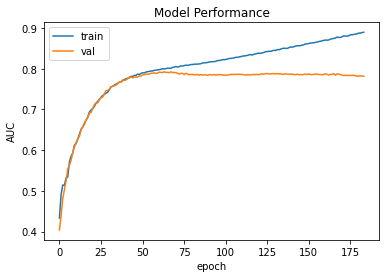

In [8]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test AUC:", test_scores[1])

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model Performance')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()